<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/CNN_Binary_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building a CNN using tensorflow.
In this tutorial, I used a dataset Kaggle.<br>
This example shows how to connect and downlaod data from Kaggle.com
__________________________________________________
<br>
<br>
<font size=2>
Written by: Arjang Fahim<br>
Date: 9-15-2021
Updated: 3-28-2022
</font>

# Section1: Installtion and Setup

In [1]:
'''
  Colab already installed tensorflow versions 1.x and 2.0,
  GPU and non GPU versions.
  For more information please check
  https://colab.research.google.com/notebooks/tensorflow_version.ipynb
'''

'\n  Colab already installed tensorflow versions 1.x and 2.0,\n  GPU and non GPU versions.\n  For more information please check\n  https://colab.research.google.com/notebooks/tensorflow_version.ipynb\n'

In [30]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step2: Inporting dataset from Kaggle to Colab

In [32]:
# installing Kaggle API

!pip install Kaggle

In [33]:
# create a directory as Kaggle in your Colab
 
! mkdir -p ~/.kaggle

In this section we need to create and download kaggle.json from kaggle.com <br>
To obtain the file from Kaggle.com <br>
1- Create an account in kaggle.com <br>
2- On the right top of your screen click on the icon (it should be a duck by   
   default, if you don't have any other picture. <br>
3- Select Account option menu.
4- Scroll down the page, click on the "Create New API Token" button.
5- kaggle.json should be downloaded on your local computer. 

In [44]:
# import API key to Google colab

from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [45]:
# copy API key to kaggle directory

!cp kaggle.json ~/.kaggle/

In [46]:
# disable API key (required by Google for the security)

!chmod 600 /root/.kaggle/kaggle.json 

In [47]:
# check the list of datasets
# code below confirms that the connetion to Kaggle is working

! kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                        2022 Ukraine Russia War                              2KB  2022-03-31 09:44:51           3838        242  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021           Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3519        104  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease    Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           6394        140  1.0              
datasets/vivek468/superstore-dataset-final                  

The data that is used for this tutorial can be found here <br>
https://www.kaggle.com/tongpython/cat-and-dog <br>
To find the command for downloding the dataset into your Colab from Kaggle (this can be done for all dataset in Kaggle)<br>
1- Open the page related to the dataset from Kaggle (e.g the link above)<br>
2- Click on the three-dots on the right top of the screen <br>
3- Choose "Copy API command" from the drop-down menu<br>

In [48]:
# importing the data set

! kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/218M [00:01<00:00, 210MB/s]
100% 218M/218M [00:01<00:00, 187MB/s]


In [49]:
# unzipping the dataset

! unzip -q /content/cat-and-dog.zip

# Step3: Building the Model

In [50]:
# creating an object (Initializing CNN)

model = tf.keras.models.Sequential()

In [51]:
# adding first CNN layer (Input layer)

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3] ))

In [52]:
# adding maxpool layer

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [53]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters = 64, kernel_size=3, padding='same', activation='relu' ))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

In [54]:
# adding flattening layer
model.add(tf.keras.layers.Flatten())

In [55]:
# adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [56]:
# adding fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [57]:
# adding output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
# compileing the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4096)             

# Section4: Fitting CNN in images

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
trinaing_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [62]:
# rescale images
datagen = ImageDataGenerator(rescale=1./255)

In [63]:
training_set = datagen.flow_from_directory(directory=trinaing_data_dir, target_size=(32,32), classes=['dogs', 'cats'], class_mode='binary',
                                            batch_size=20)
test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32,32), classes=['dogs', 'cats'], class_mode='binary',
                                            batch_size=20)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [64]:
len(training_set), len(test_set)

(401, 102)

In [65]:
len(training_set) * 20, len(test_set) *20

(8020, 2040)

In [66]:
test_set.batch_size

20

In [67]:
# train the model
# The difference between train and test accuracy shows the overfitting problem, 
# too much learning from the dataset
# For improving: 
# 1- maybe more dropout after max pool
# 2- change input shape to 64 by 64
# 3- chaning the batch size and target size 

history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/20
401/401 [==============================] - 55s 135ms/step - loss: 0.6774 - accuracy: 0.5629 - val_loss: 0.6375 - val_accuracy: 0.6560
Epoch 2/20
401/401 [==============================] - 54s 135ms/step - loss: 0.6137 - accuracy: 0.6597 - val_loss: 0.5719 - val_accuracy: 0.7123
Epoch 3/20
401/401 [==============================] - 54s 135ms/step - loss: 0.5692 - accuracy: 0.7047 - val_loss: 0.5495 - val_accuracy: 0.7261
Epoch 4/20
401/401 [==============================] - 53s 132ms/step - loss: 0.5395 - accuracy: 0.7233 - val_loss: 0.5601 - val_accuracy: 0.7123
Epoch 5/20
401/401 [==============================] - 54s 134ms/step - loss: 0.5068 - accuracy: 0.7448 - val_loss: 0.5219 - val_accuracy: 0.7439
Epoch 6/20
401/401 [==============================] - 53s 133ms/step - loss: 0.4804 - accuracy: 0.7715 - val_loss: 0.5407 - val_accuracy: 0.7380
Epoch 7/20
401/401 [==============================] - 53s 133ms/step - loss: 0.4557 - accuracy: 0.7788 - val_loss: 0.5165 - val_ac

# Section5: Plotting the learning curve

In [68]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model Accuracy')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

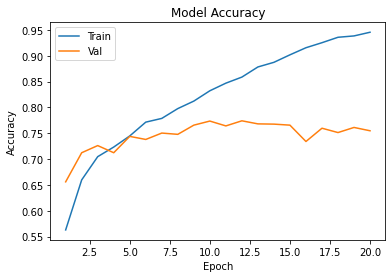

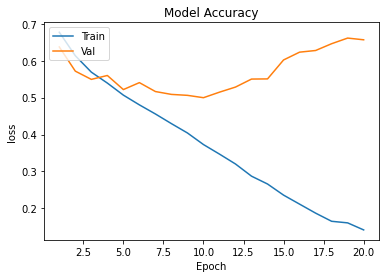

In [69]:
learning_curve(history, 20)
# After 5th epoch our model is over fitted
# because Train acc increasing but validation acc does not